# System Update function: Move Agents algorithm

Frame time and time to spent on a task (real time loop function)

In [1]:
#packages
import pandas as pd
import numpy as np
from scipy.stats import levene
from scipy.stats import f_oneway
from scipy.stats import kruskal
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

In [2]:
def descriptive_stats(dataframe, div = 1.0, roundDec = 3):
    stats = (dataframe.describe(include='all').transpose().filter (['min', '50%','mean', 'max', 'std']).set_axis(['Min.', 'Median', 'Mean', 'Max.', 'Std. Dev.'], axis = 1) / div).round(roundDec)
    print(stats.to_latex())

def processData(filename, xlabel, ylabel, figfile, funcMeans):
    frametime_update_task = pd.read_csv(filename)
    print("SIZE: " + str(frametime_update_task.shape[0]))
    
    descriptive_stats(frametime_update_task)

    boxdata = frametime_update_task.transpose().values.tolist()
    fig, ax = plt.subplots()
    ax.boxplot(boxdata)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.savefig(figfile)
    plt.show()

    d1, d2, d3, d4, d5, d6, d7, d8 = frametime_update_task.transpose().values.tolist()
    levene_result = levene(d1, d2, d3, d4, d5, d6, d7, d8)
    print("levene:\n" + str(levene_result))
    anova_result = funcMeans(d1, d2, d3, d4, d5, d6, d7, d8)
    print("Anova or kruskal:\n" + str(anova_result))
    return frametime_update_task

SIZE: 2055
\begin{tabular}{lrrrrr}
\toprule
{} &    Min. &  Median &    Mean &    Max. &  Std. Dev. \\
\midrule
agent\_ms\_1 &  20.662 &  29.954 &  29.979 &  42.115 &      2.274 \\
agent\_ms\_2 &  21.627 &  30.034 &  29.982 &  39.250 &      2.427 \\
agent\_ms\_3 &  18.504 &  29.909 &  29.986 &  40.709 &      2.560 \\
agent\_ms\_4 &  18.247 &  29.994 &  29.988 &  42.981 &      2.843 \\
agent\_ms\_5 &  10.761 &  30.014 &  29.999 &  69.607 &      3.804 \\
agent\_ms\_6 &   9.380 &  30.064 &  29.987 &  48.712 &      4.607 \\
agent\_ms\_7 &  16.534 &  29.944 &  29.989 &  43.687 &      3.383 \\
agent\_ms\_8 &  12.218 &  29.797 &  29.989 &  51.929 &      4.902 \\
\bottomrule
\end{tabular}



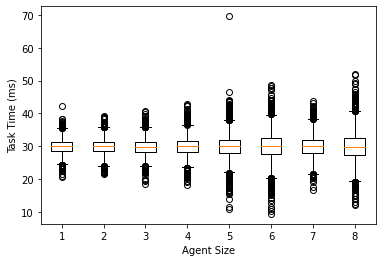

levene:
LeveneResult(statistic=181.90457869872813, pvalue=1.254755554676621e-260)
Anova or kruskal:
KruskalResult(statistic=2.9134924781261886, pvalue=0.8928878538368803)


,agent_ms_1,agent_ms_2,agent_ms_3,agent_ms_4,agent_ms_5,agent_ms_6,agent_ms_7,agent_ms_8
0,29.521,29.221,31.179,31.375,69.607,26.807,30.291,25.291
1,31.880,30.158,30.901,29.211,15.608,30.632,29.674,32.794
2,28.955,31.918,28.613,27.511,32.397,29.771,30.015,30.069
3,29.997,28.159,28.530,31.682,31.207,29.001,26.869,32.980
4,31.736,29.712,33.703,34.476,33.517,31.819,31.576,24.961
...,...,...,...,...,...,...,...,...
2050,33.360,31.032,27.054,27.523,30.664,42.281,33.177,28.121
2051,27.976,29.142,30.287,29.247,30.717,19.433,31.426,29.164
2052,29.858,31.345,29.088,28.468,27.971,32.424,26.651,30.289
2053,27.835,27.780,32.086,30.586,31.857,24.673,28.359,29.469


In [3]:
processData('./FinalDatasets/system-update-function/update-movement-task-allagents-30ms.csv', 'Agent Size', 'Task Time (ms)', 'figures/4-system-update-function/mocap-frametime-boxplot.pdf', kruskal)


SIZE: 2041
\begin{tabular}{lrrrrr}
\toprule
{} &   Min. &  Median &   Mean &    Max. &  Std. Dev. \\
\midrule
agent\_ms\_1 &  0.173 &   0.711 &  0.892 &   6.316 &      0.613 \\
agent\_ms\_2 &  0.359 &   1.396 &  1.363 &   7.046 &      0.697 \\
agent\_ms\_3 &  0.473 &   1.263 &  1.515 &   7.903 &      0.755 \\
agent\_ms\_4 &  0.816 &   2.152 &  2.399 &   8.999 &      0.917 \\
agent\_ms\_5 &  0.741 &   2.073 &  2.506 &   9.176 &      1.139 \\
agent\_ms\_6 &  1.042 &   2.894 &  3.470 &  13.907 &      1.507 \\
agent\_ms\_7 &  0.994 &   3.017 &  3.499 &  10.446 &      1.572 \\
agent\_ms\_8 &  1.241 &   2.901 &  3.437 &  12.443 &      1.594 \\
\bottomrule
\end{tabular}



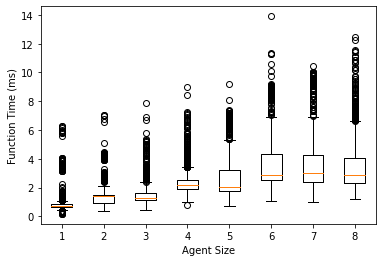

levene:
LeveneResult(statistic=273.9028628278848, pvalue=0.0)
Anova or kruskal:
KruskalResult(statistic=10278.01848349378, pvalue=0.0)


In [4]:
func_data = processData('./FinalDatasets/system-update-function/update-movement-function-allagents.csv', 'Agent Size', 'Function Time (ms)', 'figures/4-system-update-function/mocap-functime-boxplot.pdf', kruskal)

<Figure size 432x288 with 0 Axes>

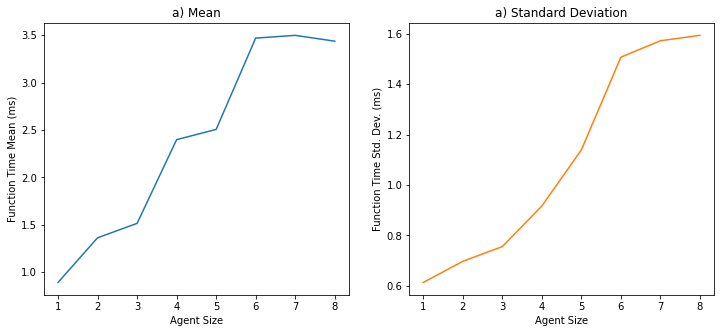

In [5]:
#Means and Std
colors = plt.rcParams["axes.prop_cycle"]()
means = np.mean(func_data.transpose().values, axis = 1)
stds = np.std(func_data.transpose().values, axis = 1)
agentsize = np.arange(1,9,1)
plt.figure()
fig, axs = plt.subplots(1, 2, figsize=(12,5))
axs[0].plot(agentsize, means, color = next(colors)["color"])
axs[0].set_title('a) Mean')
axs[0].set_xlabel('Agent Size')
axs[0].set_ylabel('Function Time Mean (ms)')
axs[1].plot(agentsize, stds, color = next(colors)["color"])
axs[1].set_title('a) Standard Deviation')
axs[1].set_xlabel('Agent Size')
axs[1].set_ylabel('Function Time Std. Dev. (ms)')
plt.savefig('figures/4-system-update-function/function-movement-mean-std.pdf')
plt.show()